<a href="https://colab.research.google.com/github/fortune-max/M4-python-refresher-ml/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Exercise 1: Download course contents from driv

In [10]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
!ls

gdrive	sample_data


In [13]:
!ls -l gdrive/MyDrive/DS404/DS404_Classwork/Day_2_Materials

lr-------- 1 root root 0 Nov 27 21:47 gdrive/MyDrive/DS404/DS404_Classwork/Day_2_Materials -> /content/gdrive/.shortcut-targets-by-id/1-og2z-OF6683SXdGe4Q3qrDx0wRud4ky/Day_2_Materials


In [12]:
!cp gdrive/MyDrive/DS404/DS404_Classwork/Day_2_Materials/* .
!ls

apple.png  gdrive  imports.py  sample_data  titanic_m.csv  university.data


Use % to run import.py

In [28]:
%run imports.py

#### Exercise 2: Download and load university.data dataset

In [14]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/university/university.data

--2023-11-28 08:28:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/university/university.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘university.data.1’

university.data.1       [  <=>               ] 156.68K   592KB/s    in 0.3s    

2023-11-28 08:28:06 (592 KB/s) - ‘university.data.1’ saved [160443]



In [19]:
!head university.data

(def-instance Adelphi
   (state newyork)
   (control private)
   (no-of-students thous:5-10)
   (male:female ratio:30:70)
   (student:faculty ratio:15:1)
   (sat verbal 500)
   (sat math 475)
   (expenses thous$:7-10)
   (percent-financial-aid 60)


In [36]:
uni_data_df = pd.read_csv('university.data', on_bad_lines='skip', header=None, names=['raw'])
uni_data_df

,raw
0,(def-instance Adelphi
1,(state newyork)
2,(control private)
3,(no-of-students thous:5-10)
4,(male:female ratio:30:70)
...,...
6041,(run-instance sc)
6042,~ (remprop sc 'features)
6043,nil)
6044,(t (remprop sc 'features) nil)))


#### Exercise 5: Extract parent objects from the dataset

In [44]:
last_object = None
def get_last_object(x):
  global last_object
  if not x.endswith(")"):
    last_object = x
  return last_object

uni_data_df["parent_object_raw"] = uni_data_df["raw"].apply(get_last_object)
uni_data_df.head(20)
# type(uni_data_df['raw'])

,raw,parent_object_raw
0,(def-instance Adelphi,(def-instance Adelphi
1,(state newyork),(def-instance Adelphi
2,(control private),(def-instance Adelphi
3,(no-of-students thous:5-10),(def-instance Adelphi
4,(male:female ratio:30:70),(def-instance Adelphi
5,(student:faculty ratio:15:1),(def-instance Adelphi
6,(sat verbal 500),(def-instance Adelphi
7,(sat math 475),(def-instance Adelphi
8,(expenses thous$:7-10),(def-instance Adelphi
9,(percent-financial-aid 60),(def-instance Adelphi


#### Exercise 6: Extract lisp data from it

In [45]:
def getA(x):
  return x.strip().split(" ")[0].replace('(', '')

def getB(x):
  return " ".join(x.strip().split(' ')[1:]).replace(')', '')

uni_data_df['lisp_A'] = uni_data_df['raw'].apply(getA)
uni_data_df['lisp_B'] = uni_data_df['raw'].apply(getB)

In [46]:
uni_data_df.head(20)

,raw,parent_object_raw,lisp_A,lisp_B
0,(def-instance Adelphi,(def-instance Adelphi,def-instance,Adelphi
1,(state newyork),(def-instance Adelphi,state,newyork
2,(control private),(def-instance Adelphi,control,private
3,(no-of-students thous:5-10),(def-instance Adelphi,no-of-students,thous:5-10
4,(male:female ratio:30:70),(def-instance Adelphi,male:female,ratio:30:70
5,(student:faculty ratio:15:1),(def-instance Adelphi,student:faculty,ratio:15:1
6,(sat verbal 500),(def-instance Adelphi,sat,verbal 500
7,(sat math 475),(def-instance Adelphi,sat,math 475
8,(expenses thous$:7-10),(def-instance Adelphi,expenses,thous$:7-10
9,(percent-financial-aid 60),(def-instance Adelphi,percent-financial-aid,60


#### Exercise 7: Extract subdatasets for particular universities

In [91]:
subdatasets = {}
for parent_uni_def in uni_data_df.query("lisp_A == 'def-instance'")['parent_object_raw'].unique():
  subdatasets[parent_uni_def] = uni_data_df.query(f"parent_object_raw == '{parent_uni_def}'")
from pprint import pprint
pprint(subdatasets.keys())

dict_keys(['(def-instance Adelphi', '(def-instance Arizona-State', '(def-instance Boston-College', '(def-instance Boston-University', '(def-instance Brown', '(def-instance Cal-Tech', '(def-instance Carnegie-Mellon', '(def-instance Case-Western', '(def-instance CCNY', '(def-instance Colgate', '(def-instance Columbia', '(def-instance Cooper-Union', '(def-instance Cornell', '(def-instance Dartmouth', '(def-instance Florida-Tech', '(def-instance Florida-state', '(def-instance Georgia-Tech', '(def-instance Harvard', '(def-instance Hofstra', '(def-instance Illinois-Tech', '(def-instance Johns-Hopkins', '(def-instance MIT', '(def-instance University-of-Montana', '(def-instance Morgan-state', '(def-instance New-Jersey-Tech', '(def-instance NYU', '(def-instance Pratt', '(def-instance Princeton', '(def-instance Rensselaer', '(def-instance Rochester-Tech', '(def-instance Stanford', '(def-instance Stevens', '(def-instance Temple', '(def-instance Texas-A&M', '(def-instance University-of-California-

In [69]:
uni_data_df.query("lisp_A == 'def-instance'")["parent_object_raw"]

0                                  (def-instance Adelphi
18                           (def-instance Arizona-State
38                          (def-instance Boston-College
58                       (def-instance Boston-University
78                                   (def-instance Brown
98                                (def-instance Cal-Tech
116                        (def-instance Carnegie-Mellon
134                           (def-instance Case-Western
154                                   (def-instance CCNY
176                                (def-instance Colgate
194                               (def-instance Columbia
212                           (def-instance Cooper-Union
230                                (def-instance Cornell
254                              (def-instance Dartmouth
272                           (def-instance Florida-Tech
292                          (def-instance Florida-state
309                           (def-instance Georgia-Tech
327                            

#### Exercise 8*: Try to merge dataset for all universities

#### Exercise 9: Load titanic_m dataset

In [109]:
# Method 1
titanic_df = pd.read_csv("titanic_m.csv")
titanic_df = titanic_df.drop(titanic_df.columns[0], axis=1)
titanic_df

# Method 2
# titanic_df = pd.read_csv("titanic_m.csv", index_col=0)
# titanic_df.reset_index(drop=True, inplace=True)
# titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Exercise 10:  Select sub-dataframe with columns Survived, Name, Sex, Age

In [118]:
print(titanic_df.loc[3:5, ['Name', 'Sex', 'Age']])

print(titanic_df.iloc[6:9, 3:6])

                                           Name     Sex   Age
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0
4                      Allen, Mr. William Henry    male  35.0
5                              Moran, Mr. James    male   NaN
                                                Name     Sex   Age
6                            McCarthy, Mr. Timothy J    male  54.0
7                     Palsson, Master. Gosta Leonard    male   2.0
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0


#### Exercise 11: Perform various subselections

In [119]:
titanic_df.loc[titanic_df.Age > 20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [122]:
titanic_df.loc[(titanic_df.Age > 20) & (titanic_df.Sex == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [125]:
titanic_df.loc[(titanic_df.Age > 60) & (titanic_df.Sex == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


#### Exercise 12: Change part of the selection

In [171]:
titanic_df.loc[titanic_df.Age == 66.0][["Name", "Age"]]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0


In [172]:
titanic_df.loc[titanic_df.Age == 66.0, "Age"] = 909.0

In [173]:
titanic_df.loc[titanic_df.Age == 66.0][["Name", "Age"]]

,Name,Age


In [174]:
titanic_df.loc[titanic_df.Age == 909.0][["Name", "Age"]]

,Name,Age
33,"Wheadon, Mr. Edward H",909.0


In [178]:
titanic_df.loc[(titanic_df.Age == '60.0') & (titanic_df.Sex == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [132]:
titanic_df.loc[(titanic_df.Age > 60) & (titanic_df.Sex == 'female')]

TypeError: ignored

#### Exercise 13: Perform selection query both ways

In [ ]:
titanic_m_df = pd.read_csv('titanic_m.csv', index_col=0)
titanic_m_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
18,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
19,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
20,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
21,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
903,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
904,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
905,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
906,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Exercise 14: Change age for all male passengers of Titanic to +1 year

In [ ]:
titanic_m_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
18,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
19,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
20,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
21,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
903,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
904,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
905,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
906,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Exercise 15: Demonstrate apply function

#### Exercise 16: Following the example, create dataset consisting of 100 panda datasets

In [ ]:
import pandas as pd

pd_df_1 = pd.DataFrame({'c':[2,3,4]})
pd_df_2 = pd.DataFrame({'c':[2,3,5]})
pd_df_3 = pd.DataFrame({'c':[2,3,6]})
pd_df_11 = pd.DataFrame({'a':[1,2,3], 'b':[pd_df_1,pd_df_2,pd_df_3]})

pd_df_11

,a,b
0,1,c 0 2 1 3 2 4
1,2,c 0 2 1 3 2 5
2,3,c 0 2 1 3 2 6


In [ ]:

pd_df_11.iloc[2,1]


,c
0,2
1,3
2,6


#### Exercise 17: Tinker with numpy variables and apply function of adding 3 to sum values

In [ ]:
my_ndarray = np.array( range(100)).reshape( (10,5,2) )
my_ndarray


array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9]],

       [[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]],

       [[20, 21],
        [22, 23],
        [24, 25],
        [26, 27],
        [28, 29]],

       [[30, 31],
        [32, 33],
        [34, 35],
        [36, 37],
        [38, 39]],

       [[40, 41],
        [42, 43],
        [44, 45],
        [46, 47],
        [48, 49]],

       [[50, 51],
        [52, 53],
        [54, 55],
        [56, 57],
        [58, 59]],

       [[60, 61],
        [62, 63],
        [64, 65],
        [66, 67],
        [68, 69]],

       [[70, 71],
        [72, 73],
        [74, 75],
        [76, 77],
        [78, 79]],

       [[80, 81],
        [82, 83],
        [84, 85],
        [86, 87],
        [88, 89]],

       [[90, 91],
        [92, 93],
        [94, 95],
        [96, 97],
        [98, 99]]])

In [ ]:

import matplotlib.pyplot as plt
import cv2



In [ ]:
im = cv2.imread('apple.png')
im

array([[[123, 151, 143],
        [124, 145, 157],
        [121, 145, 158],
        ...,
        [ 97, 130, 127],
        [100, 133, 130],
        [100, 133, 130]],

       [[127, 151, 153],
        [124, 146, 156],
        [120, 145, 156],
        ...,
        [100, 133, 130],
        [102, 135, 132],
        [100, 133, 130]],

       [[132, 156, 160],
        [128, 151, 157],
        [123, 149, 155],
        ...,
        [ 93, 127, 124],
        [ 95, 129, 125],
        [100, 136, 126]],

       ...,

       [[  6,  11,  10],
        [  7,  12,  11],
        [  8,  12,  12],
        ...,
        [ 99, 122,  87],
        [ 88, 111,  77],
        [ 83, 104,  66]],

       [[  6,  11,  10],
        [  6,  11,  10],
        [  8,  13,  11],
        ...,
        [ 86, 113,  67],
        [ 77, 102,  60],
        [ 68,  87,  54]],

       [[  7,  11,  10],
        [  6,  12,   9],
        [  8,  13,  10],
        ...,
        [ 84, 110,  65],
        [ 51,  76,  37],
        [ 24,  44,  15]]

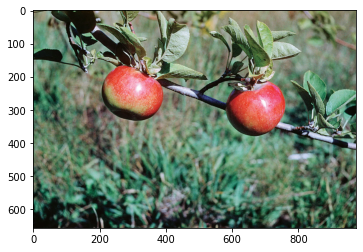

In [ ]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [ ]:
type(im)

numpy.ndarray

In [ ]:
im

In [ ]:
im.shape

(656, 974, 3)

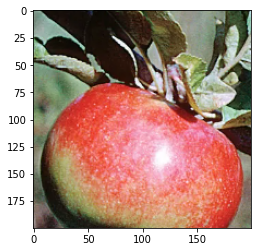

In [ ]:
plt.imshow(im[100:300, 200:400, :])

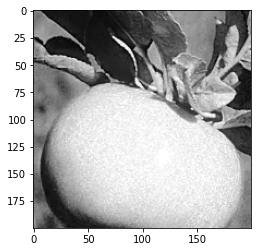

In [ ]:
plt.imshow(im[100:300, 200:400, 0], cmap=plt.get_cmap('gray'))

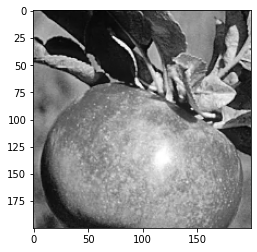

In [ ]:
plt.imshow(np.apply_along_axis(np.mean, 2, im[100:300, 200:400, :]), cmap=plt.get_cmap('gray'))

In [ ]:
np.apply_over_axes(np.mean, im[100:300, 200:400, :], [0,1])

array([[[156.69885 , 111.883275,  95.695075]]])

In [ ]:
np.apply_over_axes(np.mean, im[500:600, 0:200, :], [0,1])

array([[[60.0386 , 96.73365, 78.494  ]]])

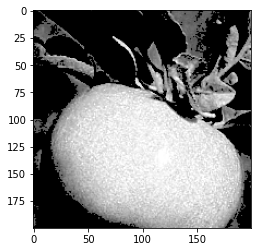

In [ ]:
def our_apple_segmentation_function(x):
  if x[0] > 140.0:
    return 0.5 + (x[0]-140)/115.
  else:
    return 0.
plt.imshow(np.apply_along_axis(our_apple_segmentation_function, 2,
                               im[100:300, 200:400, :]), cmap=plt.get_cmap('gray'))

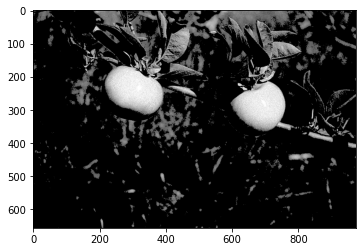

In [ ]:
plt.imshow(np.apply_along_axis(our_apple_segmentation_function, 2,
                               im), cmap=plt.get_cmap('gray'))

In [ ]:
gray_im = np.apply_along_axis(np.mean, 2, im)

In [ ]:
normalized_gray_im = (gray_im - np.mean(gray_im))/np.std(gray_im)

In [ ]:
(normalized_gray_im[100:300, 200:400] * normalized_gray_im[100:300, 200:400]).mean()

1.6977093026398302

In [ ]:
(normalized_gray_im[100:300, 200:400] * normalized_gray_im[400:600, 0:200]).mean()

-0.138913560453845

In [ ]:
normalized_im = np.zeros_like(im)

normalized_im[:,:,0] = (im[:,:,0] - np.mean(im[:,:,0]))/np.std(im[:,:,0])

normalized_im[:,:,1] = (im[:,:,1] - np.mean(im[:,:,1]))/np.std(im[:,:,1])

normalized_im[:,:,2] = (im[:,:,2] - np.mean(im[:,:,2]))/np.std(im[:,:,2])

In [ ]:
(normalized_im[100:300, 200:400,:] * normalized_im[100:300, 200:400,:]).mean()

1.06135

In [ ]:
(normalized_im[100:300, 200:400,:] * normalized_im[400:600, 0:200,:]).mean()

16.80505

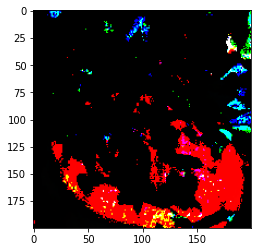

In [ ]:
plt.imshow(normalized_im[100:300, 200:400,:] * normalized_im[400:600, 0:200,:])

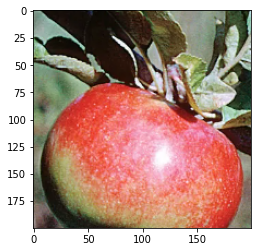

In [ ]:
plt.imshow(im[100:300, 200:400,:])

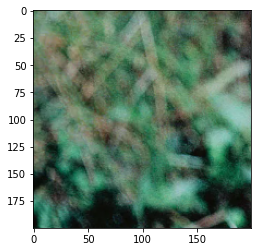

In [ ]:
 plt.imshow(im[400:600, 0:200,:])

#### Exercise 17.2* Draw the segmentation map for apple

In [ ]:
(normalized_gray_im[100:300, 200:400] * normalized_gray_im[ ????? ])

## Addition to detesets
### Exercise 18: Group by and apply functions

In [ ]:
titanic_m_df[['Sex','Embarked','Survived']]

,Sex,Embarked,Survived
17,male,S,0
18,female,C,1
19,female,S,1
20,female,S,1
21,male,S,0
...,...,...,...
903,male,S,0
904,female,S,1
905,female,S,0
906,male,C,1


#### Excercise 19: Iterate through groupBy groups

## Homework
1. Take a [quiz](https://www.w3schools.com/python/pandas/pandas_quiz.asp) to check your knowledge
2. Do the homework in the same folder.


## Additional info:
- [generator](https://realpython.com/introduction-to-python-generators/)
- [decorator](https://habr.com/ru/companies/otus/articles/727590/)